# Dataset MERGE: Análise Exploratória Completa com DatasetLoader

**Projeto Big Data Processing in Python - Estudante ID: 23155**

Este notebook demonstra a análise exploratória completa do dataset MERGE utilizando o **DatasetLoader** implementado. Incluindo:

📊 **Análise Geral:**
- Carregamento com DatasetLoader
- Estrutura e características dos datasets
- Estatísticas descritivas

🎵 **Análise por Modalidade:**
- Audio, Bimodal, Lyrics
- Datasets balanceados vs completos
- Distribuições por quadrante emocional

📈 **Visualizações:**
- Distribuições de Arousal e Valence
- Análise temporal (décadas)
- Correlações entre modalidades
- Análise de splits TVT

🔍 **Insights:**
- Padrões emocionais por modalidade
- Qualidade dos dados
- Recomendações para uso

In [10]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

In [11]:
# Inicializar o DatasetLoader
print("🔄 Inicializando DatasetLoader...")
loader = DatasetLoader()

# Carregar dataset padrão (merge_unified)
print("📥 Carregando dataset padrão (merge_unified)...")
df = loader.load_default()

# Informações básicas
print("\n✅ Dataset carregado com sucesso!")
print(f"📊 Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
print(f"🗓️ Data de carregamento: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Preview dos dados
print("\n👀 Preview dos primeiros registros:")
df.head()

🔄 Inicializando DatasetLoader...
📥 Carregando dataset padrão (merge_unified)...

✅ Dataset carregado com sucesso!
📊 Dimensões: 3,906 linhas × 34 colunas
🗓️ Data de carregamento: 2025-06-05 11:04:43

👀 Preview dos primeiros registros:


,Merge_id,Song_id,Lyric_id,bimodal,Quadrant,AllMusic Id,AllMusic Extraction Date,Artist,Title,Relevance,...,Sample,SampleURL,ActualYear,num_Genres,num_MoodsAll,Arousal,Valence,in_bimodal_balanced,in_audio_balanced,in_lyrics_balanced
0,A001_L051,A001,L051,True,Q4,MT0000291374,New,Louis Armstrong,What a Wonderful World,NaN,...,NaN,NaN,1968,NaN,NaN,0.29375,0.89375,True,True,True
1,A002_L052,A002,L052,True,Q4,MT0001577585,Old,Rod Stewart,Country Comfort,1.493585,...,1.0,http://rovimusic.rovicorp.com/playback.mp3?c=s...,1970,NaN,NaN,0.33750,0.68125,False,True,True
2,A003_L053,A003,L053,True,Q3,MT0008469560,New,Stevie Wonder,Lately,NaN,...,NaN,NaN,1980,NaN,NaN,0.25000,0.22500,True,True,True
3,A004_L054,A004,L054,True,Q3,MT0030326044,New,Johnny Cash,I'm So Lonesome I Could Cry,NaN,...,NaN,NaN,1960,NaN,NaN,0.20000,0.18125,True,True,True
4,A005_L055,A005,L055,True,Q1,MT0005204984,New,Prince,U Got the Look,NaN,...,NaN,NaN,1987,NaN,NaN,0.78750,0.68750,True,True,True


## 1. 📊 Visão Geral do Dataset Unificado

In [12]:
# Obter informações detalhadas usando o DatasetLoader
info = loader.get_dataset_info("unified")

print("=== 📋 INFORMAÇÕES GERAIS (DatasetLoader) ===")
print(f"📊 Shape do dataset: {info['shape'][0]:,} registros × {info['shape'][1]} colunas")
print(f"🎯 Distribuição por quadrantes: {info['quadrants']}")

print("\n=== 🗂️ ESTRUTURA DAS COLUNAS ===")
print(f"Total de colunas: {len(info['columns'])}")
print("\nPrimeiras 15 colunas:")
for i, col in enumerate(info['columns'][:15], 1):
    print(f"{i:2d}. {col}")

print("\n=== 🎛️ COLUNAS BALANCEADAS ===")
if 'balanced_columns' in info:
    for col, counts in info['balanced_columns'].items():
        print(f"{col}: {counts}")

print("\n=== 📝 TIPOS DE DADOS ===")
type_counts = pd.Series(info['data_types']).value_counts()
for dtype, count in type_counts.items():
    print(f"{dtype}: {count} colunas")

=== 📋 INFORMAÇÕES GERAIS (DatasetLoader) ===
📊 Shape do dataset: 3,906 registros × 34 colunas
🎯 Distribuição por quadrantes: {'Q4': 1075, 'Q2': 952, 'Q1': 950, 'Q3': 929}

=== 🗂️ ESTRUTURA DAS COLUNAS ===
Total de colunas: 34

Primeiras 15 colunas:
 1. Merge_id
 2. Song_id
 3. Lyric_id
 4. bimodal
 5. Quadrant
 6. AllMusic Id
 7. AllMusic Extraction Date
 8. Artist
 9. Title
10. Relevance
11. Year
12. LowestYear
13. Duration
14. Moods
15. MoodsAll

=== 🎛️ COLUNAS BALANCEADAS ===
in_bimodal_balanced: {True: 2000, False: 1906}
in_audio_balanced: {True: 3232, False: 674}
in_lyrics_balanced: {True: 2400, False: 1506}

=== 📝 TIPOS DE DADOS ===
object: 23 colunas
float64: 7 colunas
bool: 4 colunas


In [13]:
# Análise de valores ausentes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Filtrar apenas colunas com dados ausentes
missing_summary = pd.DataFrame({
    'Coluna': missing_data.index,
    'Valores_Ausentes': missing_data.values,
    'Percentual': missing_percent.values
}).query('Valores_Ausentes > 0').sort_values('Valores_Ausentes', ascending=False)

print("=== 🔍 ANÁLISE DE VALORES AUSENTES ===")
if len(missing_summary) > 0:
    print(f"Total de colunas com dados ausentes: {len(missing_summary)}")
    print("\nTop 10 colunas com mais valores ausentes:")
    print(missing_summary.head(10).to_string(index=False))
else:
    print("✅ Nenhum valor ausente encontrado no dataset!")

# Resumo por modalidade
print("\n=== 🎵 DISTRIBUIÇÃO POR MODALIDADE ===")
print(f"Total de entradas bimodais: {df['bimodal'].sum():,}")
print(f"Total de entradas não-bimodais: {(~df['bimodal']).sum():,}")
print(f"Percentual bimodal: {(df['bimodal'].sum() / len(df) * 100):.1f}%")

=== 🔍 ANÁLISE DE VALORES AUSENTES ===
Total de colunas com dados ausentes: 23

Top 10 colunas com mais valores ausentes:
             Coluna  Valores_Ausentes  Percentual
       num_MoodsAll              3896   99.743984
         num_Genres              3896   99.743984
           Lyric_id              1338   34.254992
         LowestYear              1168   29.902714
       ThemeWeights               687   17.588326
             Themes               687   17.588326
               Year               430   11.008705
AppearancesAlbumIDs               413   10.573477
AppearancesTrackIDs               413   10.573477
            Song_id               352    9.011777

=== 🎵 DISTRIBUIÇÃO POR MODALIDADE ===
Total de entradas bimodais: 2,216
Total de entradas não-bimodais: 1,690
Percentual bimodal: 56.7%


## 2. Análise das Modalidades e Distribuições

In [14]:
# Calcular contagens para modalidades
def calculate_modality_counts(df):
    """
    Calcula as contagens para cada modalidade (Audio, Lyrics, Bimodal)
    tanto para Complete quanto para Balanced
    """
    results = {}
    
    # COMPLETE - baseado na presença de dados
    # Audio: tem Song_id (inclui bimodal + audio-only)
    results['complete_audio'] = (~df['Song_id'].isnull()).sum()
    
    # Lyrics: tem Lyric_id (inclui bimodal + lyrics-only)
    results['complete_lyrics'] = (~df['Lyric_id'].isnull()).sum()
    
    # Bimodal: tem ambos Song_id E Lyric_id
    results['complete_bimodal'] = df['bimodal'].sum()
    
    # BALANCED - baseado em colunas específicas
    if 'in_audio_balanced' in df.columns:
        results['balanced_audio'] = df['in_audio_balanced'].sum()
    else:
        results['balanced_audio'] = 0
        
    if 'in_lyrics_balanced' in df.columns:
        results['balanced_lyrics'] = df['in_lyrics_balanced'].sum()
    else:
        results['balanced_lyrics'] = 0
        
    if 'in_bimodal_balanced' in df.columns:
        results['balanced_bimodal'] = df['in_bimodal_balanced'].sum()
    else:
        results['balanced_bimodal'] = 0
    
    return results

# Calcular as contagens
counts = calculate_modality_counts(df)

# Criar tabela de resultados
results_table = pd.DataFrame({
    'Complete': [counts['complete_audio'], counts['complete_lyrics'], counts['complete_bimodal']],
    'Balanced': [counts['balanced_audio'], counts['balanced_lyrics'], counts['balanced_bimodal']]
}, index=['Audio', 'Lyrics', 'Bimodal (Audio+Lyrics)'])

print("=== DISTRIBUIÇÃO POR MODALIDADE ===")
print(results_table)

# Comparar com valores esperados
expected_complete = [3554, 2568, 2216]
expected_balanced = [3232, 2400, 2000]

print("\n=== COMPARAÇÃO COM VALORES ESPERADOS ===")
comparison = pd.DataFrame({
    'Complete (Real)': [counts['complete_audio'], counts['complete_lyrics'], counts['complete_bimodal']],
    'Complete (Esperado)': expected_complete,
    'Balanced (Real)': [counts['balanced_audio'], counts['balanced_lyrics'], counts['balanced_bimodal']],
    'Balanced (Esperado)': expected_balanced
}, index=['Audio', 'Lyrics', 'Bimodal'])

# Calcular diferenças
comparison['Diff Complete'] = comparison['Complete (Real)'] - comparison['Complete (Esperado)']
comparison['Diff Balanced'] = comparison['Balanced (Real)'] - comparison['Balanced (Esperado)']

print(comparison)

=== DISTRIBUIÇÃO POR MODALIDADE ===
                        Complete  Balanced
Audio                       3554      3232
Lyrics                      2568      2400
Bimodal (Audio+Lyrics)      2216      2000

=== COMPARAÇÃO COM VALORES ESPERADOS ===
         Complete (Real)  Complete (Esperado)  Balanced (Real)  \
Audio               3554                 3554             3232   
Lyrics              2568                 2568             2400   
Bimodal             2216                 2216             2000   

         Balanced (Esperado)  Diff Complete  Diff Balanced  
Audio                   3232              0              0  
Lyrics                  2400              0              0  
Bimodal                 2000              0              0  


## 3. Visualizações das Distribuições

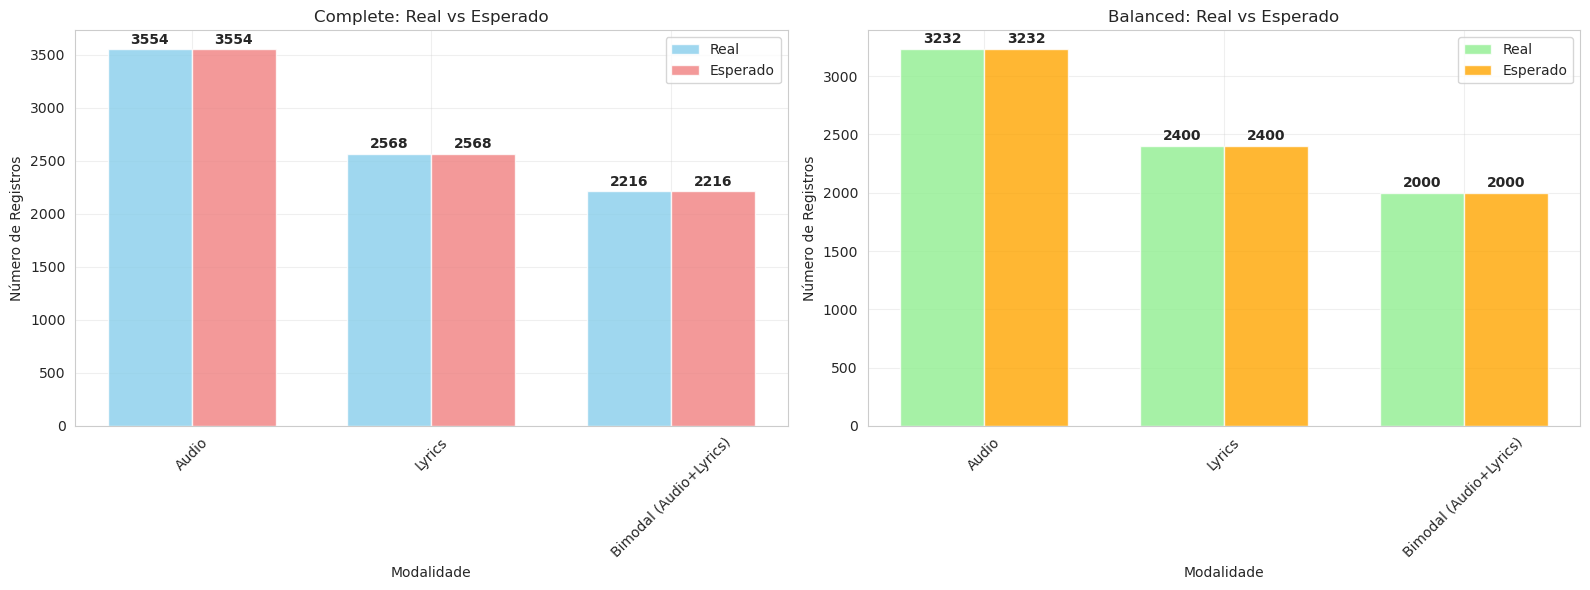

In [15]:
# Gráfico de barras comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Complete vs Expected
x_pos = np.arange(len(results_table.index))
width = 0.35

ax1.bar(x_pos - width/2, comparison['Complete (Real)'], width, label='Real', alpha=0.8, color='skyblue')
ax1.bar(x_pos + width/2, comparison['Complete (Esperado)'], width, label='Esperado', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Modalidade')
ax1.set_ylabel('Número de Registros')
ax1.set_title('Complete: Real vs Esperado')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_table.index, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(comparison['Complete (Real)']):
    ax1.text(i - width/2, v + 50, str(v), ha='center', fontweight='bold')
for i, v in enumerate(comparison['Complete (Esperado)']):
    ax1.text(i + width/2, v + 50, str(v), ha='center', fontweight='bold')

# Balanced vs Expected
ax2.bar(x_pos - width/2, comparison['Balanced (Real)'], width, label='Real', alpha=0.8, color='lightgreen')
ax2.bar(x_pos + width/2, comparison['Balanced (Esperado)'], width, label='Esperado', alpha=0.8, color='orange')

ax2.set_xlabel('Modalidade')
ax2.set_ylabel('Número de Registros')
ax2.set_title('Balanced: Real vs Esperado')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_table.index, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(comparison['Balanced (Real)']):
    ax2.text(i - width/2, v + 50, str(v), ha='center', fontweight='bold')
for i, v in enumerate(comparison['Balanced (Esperado)']):
    ax2.text(i + width/2, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

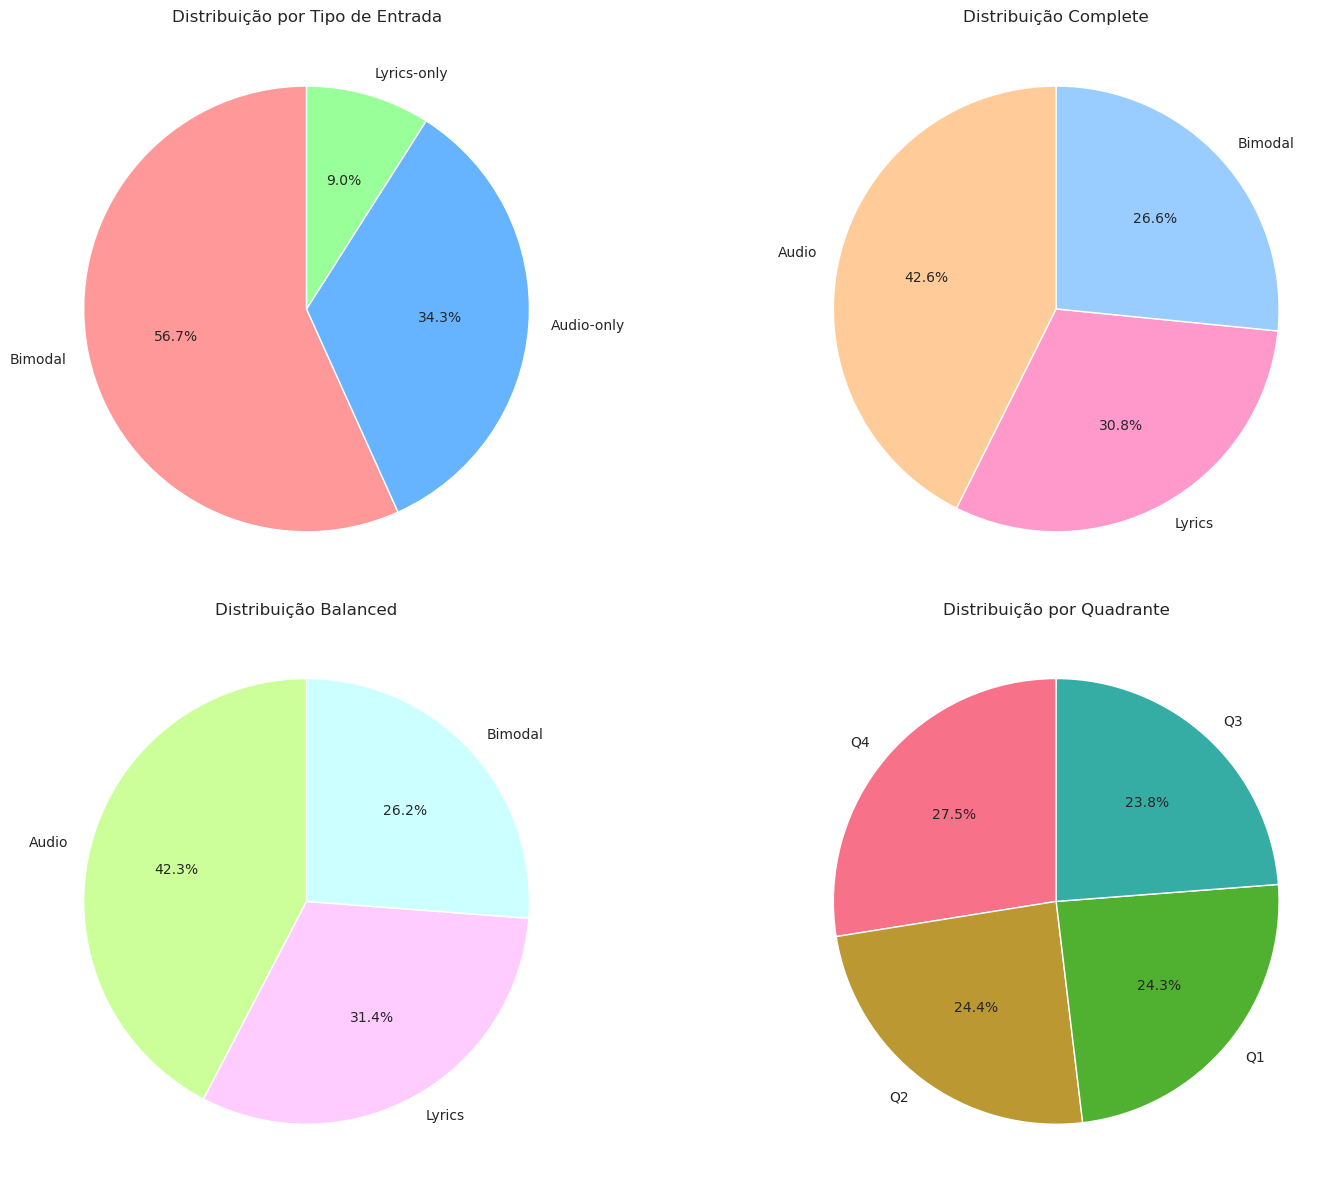

In [16]:
# Gráfico de pizza para distribuição de modalidades
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Distribuição geral por tipo de entrada
bimodal_count = df['bimodal'].sum()
audio_only = ((~df['bimodal']) & (df['Song_id'].notna())).sum()
lyrics_only = ((~df['bimodal']) & (df['Song_id'].isna())).sum()

type_counts = [bimodal_count, audio_only, lyrics_only]
type_labels = ['Bimodal', 'Audio-only', 'Lyrics-only']
colors1 = ['#ff9999', '#66b3ff', '#99ff99']

ax1.pie(type_counts, labels=type_labels, autopct='%1.1f%%', colors=colors1, startangle=90)
ax1.set_title('Distribuição por Tipo de Entrada')

# Complete distribution
complete_values = [counts['complete_audio'], counts['complete_lyrics'], counts['complete_bimodal']]
complete_labels = ['Audio', 'Lyrics', 'Bimodal']
colors2 = ['#ffcc99', '#ff99cc', '#99ccff']

ax2.pie(complete_values, labels=complete_labels, autopct='%1.1f%%', colors=colors2, startangle=90)
ax2.set_title('Distribuição Complete')

# Balanced distribution (se existir)
if counts['balanced_audio'] > 0 or counts['balanced_lyrics'] > 0 or counts['balanced_bimodal'] > 0:
    balanced_values = [counts['balanced_audio'], counts['balanced_lyrics'], counts['balanced_bimodal']]
    balanced_labels = ['Audio', 'Lyrics', 'Bimodal']
    colors3 = ['#ccff99', '#ffccff', '#ccffff']
    
    ax3.pie(balanced_values, labels=balanced_labels, autopct='%1.1f%%', colors=colors3, startangle=90)
    ax3.set_title('Distribuição Balanced')
else:
    ax3.text(0.5, 0.5, 'Dados Balanced\nnão disponíveis', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Distribuição Balanced')

# Quadrant distribution (se existir)
if 'Quadrant' in df.columns:
    quadrant_counts = df['Quadrant'].value_counts()
    ax4.pie(quadrant_counts.values, labels=quadrant_counts.index, autopct='%1.1f%%', startangle=90)
    ax4.set_title('Distribuição por Quadrante')
else:
    ax4.text(0.5, 0.5, 'Dados de Quadrante\nnão disponíveis', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Distribuição por Quadrante')

plt.tight_layout()
plt.show()

## 4. Análise de Arousal e Valence

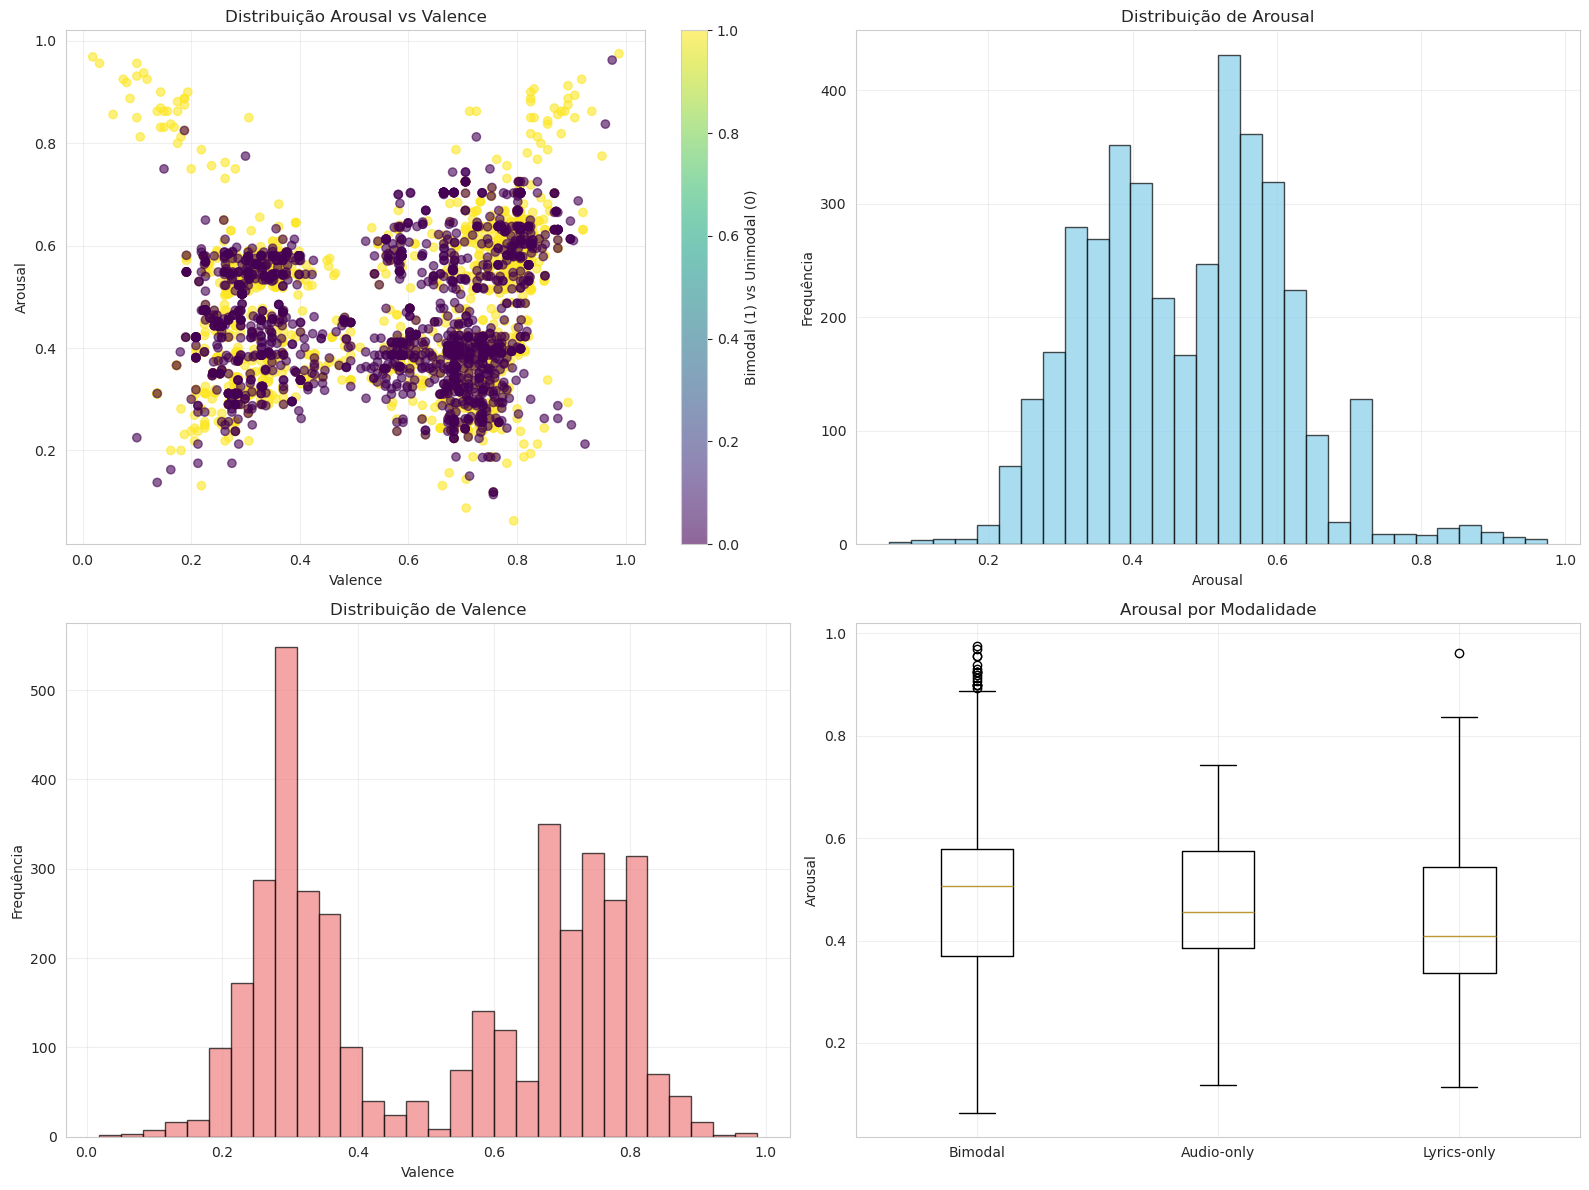

=== ESTATÍSTICAS DE AROUSAL E VALENCE ===
           Arousal      Valence
count  3906.000000  3906.000000
mean      0.475240     0.519272
std       0.134939     0.223397
min       0.062500     0.018750
25%       0.370625     0.293750
50%       0.473750     0.561562
75%       0.572500     0.734375
max       0.975000     0.987500


In [17]:
# Análise de Arousal e Valence (se disponíveis)
if 'Arousal' in df.columns and 'Valence' in df.columns:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Scatter plot Arousal vs Valence
    scatter = ax1.scatter(df['Valence'], df['Arousal'], alpha=0.6, c=df['bimodal'].astype(int), cmap='viridis')
    ax1.set_xlabel('Valence')
    ax1.set_ylabel('Arousal')
    ax1.set_title('Distribuição Arousal vs Valence')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Bimodal (1) vs Unimodal (0)')
    
    # Histograma de Arousal
    ax2.hist(df['Arousal'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_xlabel('Arousal')
    ax2.set_ylabel('Frequência')
    ax2.set_title('Distribuição de Arousal')
    ax2.grid(True, alpha=0.3)
    
    # Histograma de Valence
    ax3.hist(df['Valence'].dropna(), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    ax3.set_xlabel('Valence')
    ax3.set_ylabel('Frequência')
    ax3.set_title('Distribuição de Valence')
    ax3.grid(True, alpha=0.3)
    
    # Box plot comparando Arousal por modalidade
    modality_data = []
    modality_labels = []
    
    if bimodal_count > 0:
        modality_data.append(df[df['bimodal'] == True]['Arousal'].dropna())
        modality_labels.append('Bimodal')
    
    if audio_only > 0:
        modality_data.append(df[(~df['bimodal']) & (df['Song_id'].notna())]['Arousal'].dropna())
        modality_labels.append('Audio-only')
        
    if lyrics_only > 0:
        modality_data.append(df[(~df['bimodal']) & (df['Song_id'].isna())]['Arousal'].dropna())
        modality_labels.append('Lyrics-only')
    
    if modality_data:
        ax4.boxplot(modality_data, labels=modality_labels)
        ax4.set_ylabel('Arousal')
        ax4.set_title('Arousal por Modalidade')
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas descritivas
    print("=== ESTATÍSTICAS DE AROUSAL E VALENCE ===")
    arousal_stats = df['Arousal'].describe()
    valence_stats = df['Valence'].describe()
    
    stats_df = pd.DataFrame({
        'Arousal': arousal_stats,
        'Valence': valence_stats
    })
    print(stats_df)
else:
    print("⚠️ Dados de Arousal e Valence não disponíveis")

## 5. Análise Temporal e por Artista

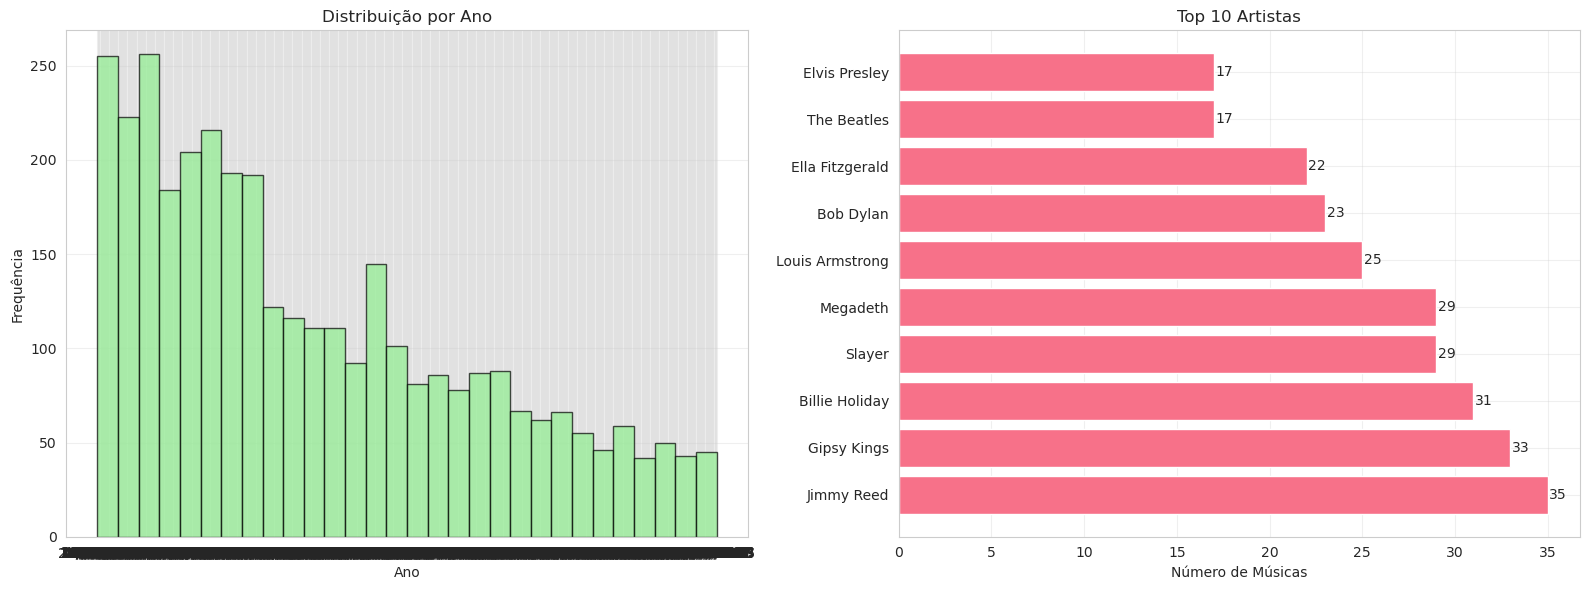

=== ESTATÍSTICAS TEMPORAIS ===
Ano mais antigo: {years.min():.0f}
Ano mais recente: {years.max():.0f}
Ano médio: {years.mean():.1f}
Mediana: {years.median():.0f}


In [18]:
# Análise por ano (se disponível)
if 'Year' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Distribuição por ano
    years = df['Year'].dropna()
    if len(years) > 0:
        ax1.hist(years, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        ax1.set_xlabel('Ano')
        ax1.set_ylabel('Frequência')
        ax1.set_title('Distribuição por Ano')
        ax1.grid(True, alpha=0.3)
    
    # Top 10 artistas
    if 'Artist' in df.columns:
        top_artists = df['Artist'].value_counts().head(10)
        ax2.barh(range(len(top_artists)), top_artists.values)
        ax2.set_yticks(range(len(top_artists)))
        ax2.set_yticklabels(top_artists.index)
        ax2.set_xlabel('Número de Músicas')
        ax2.set_title('Top 10 Artistas')
        ax2.grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, v in enumerate(top_artists.values):
            ax2.text(v + 0.1, i, str(v), va='center')
    
    plt.tight_layout()
    plt.show()
    
    print("=== ESTATÍSTICAS TEMPORAIS ===")
    if len(years) > 0:
        print("Ano mais antigo: {years.min():.0f}")
        print("Ano mais recente: {years.max():.0f}")
        print("Ano médio: {years.mean():.1f}")
        print("Mediana: {years.median():.0f}")
else:
    print("⚠️ Dados temporais não disponíveis")

## 6. Análise de Gêneros Musicais

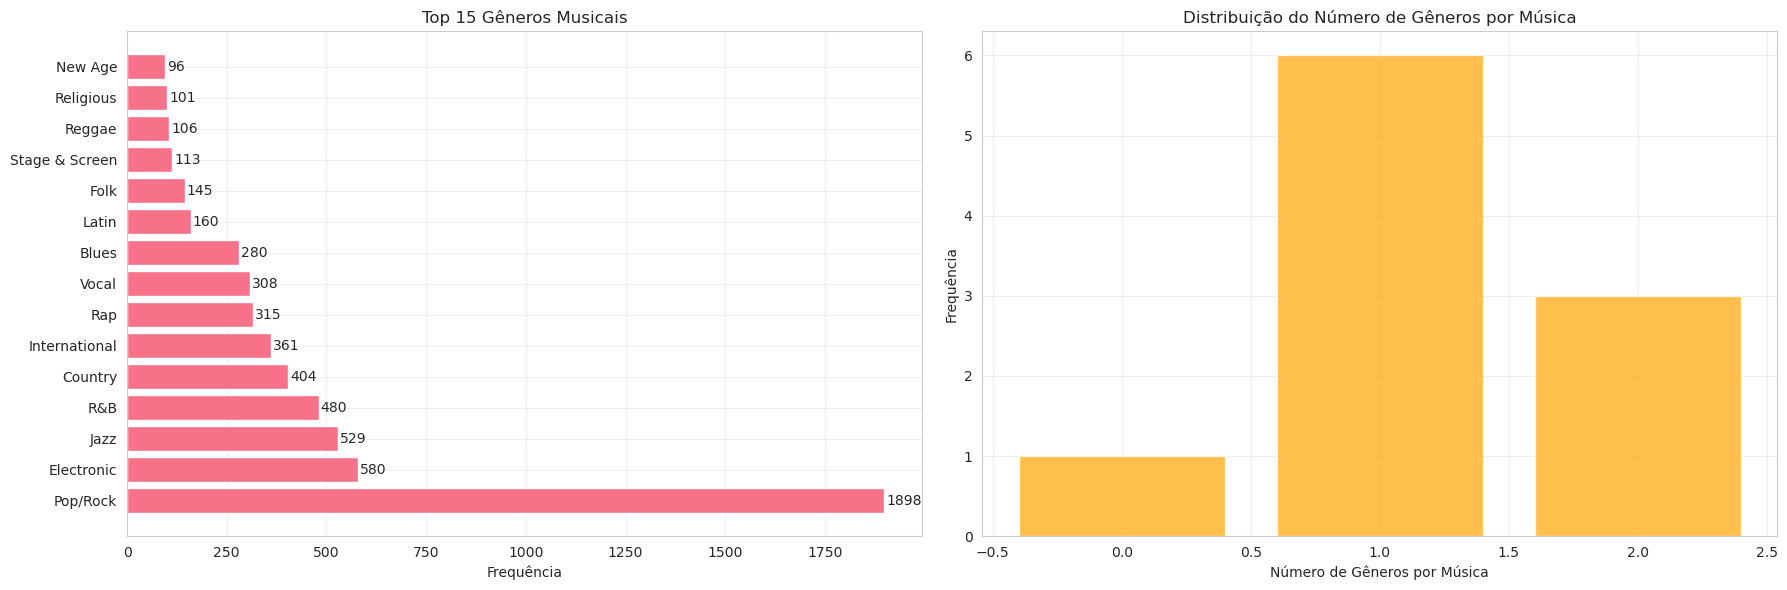

=== ESTATÍSTICAS DE GÊNEROS ===
Total de gêneros únicos: 15
Gênero mais comum: Pop/Rock (1898 ocorrências)
Média de gêneros por música: 1.20
Máximo de gêneros em uma música: 2.0


In [19]:
# Análise de gêneros (se disponível)
if 'Genres' in df.columns:
    # Processar gêneros (separados por vírgula)
    all_genres = []
    for genres_str in df['Genres'].dropna():
        if isinstance(genres_str, str):
            genres_list = [g.strip() for g in genres_str.split(',')]
            all_genres.extend(genres_list)
    
    if all_genres:
        genre_counts = pd.Series(all_genres).value_counts().head(15)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        
        # Top 15 gêneros
        ax1.barh(range(len(genre_counts)), genre_counts.values)
        ax1.set_yticks(range(len(genre_counts)))
        ax1.set_yticklabels(genre_counts.index, fontsize=10)
        ax1.set_xlabel('Frequência')
        ax1.set_title('Top 15 Gêneros Musicais')
        ax1.grid(True, alpha=0.3)
        
        # Adicionar valores nas barras
        for i, v in enumerate(genre_counts.values):
            ax1.text(v + 5, i, str(v), va='center')
        
        # Número de gêneros por música
        if 'num_Genres' in df.columns:
            genre_counts_per_song = df['num_Genres'].value_counts().sort_index()
            ax2.bar(genre_counts_per_song.index, genre_counts_per_song.values, alpha=0.7, color='orange')
            ax2.set_xlabel('Número de Gêneros por Música')
            ax2.set_ylabel('Frequência')
            ax2.set_title('Distribuição do Número de Gêneros por Música')
            ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"=== ESTATÍSTICAS DE GÊNEROS ===")
        print(f"Total de gêneros únicos: {len(genre_counts)}")
        print(f"Gênero mais comum: {genre_counts.index[0]} ({genre_counts.iloc[0]} ocorrências)")
        
        if 'num_Genres' in df.columns:
            print(f"Média de gêneros por música: {df['num_Genres'].mean():.2f}")
            print(f"Máximo de gêneros em uma música: {df['num_Genres'].max()}")
    else:
        print("⚠️ Nenhum gênero encontrado nos dados")
else:
    print("⚠️ Dados de gêneros não disponíveis")

## 7. Resumo Final e Conclusões

In [23]:
# Resumo final
print("="*60)
print("         RESUMO FINAL DA ANÁLISE EXPLORATÓRIA")
print("="*60)

print(f"\n📊 DADOS GERAIS:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Total de colunas: {len(df.columns)}")
print(f"   • Registros únicos (Merge_id): {df['Merge_id'].nunique():,}")

print(f"\n🎵 DISTRIBUIÇÃO POR MODALIDADE:")
print(f"   • Entradas Bimodais: {bimodal_count:,} ({bimodal_count/len(df)*100:.1f}%)")
print(f"   • Entradas Audio-only: {audio_only:,} ({audio_only/len(df)*100:.1f}%)")
print(f"   • Entradas Lyrics-only: {lyrics_only:,} ({lyrics_only/len(df)*100:.1f}%)")

print(f"\n📈 CONTAGENS COMPLETE:")
print(f"   • Audio: {counts['complete_audio']:,}")
print(f"   • Lyrics: {counts['complete_lyrics']:,}")
print(f"   • Bimodal: {counts['complete_bimodal']:,}")

print(f"\n⚖️ CONTAGENS BALANCED:")
print(f"   • Audio: {counts['balanced_audio']:,}")
print(f"   • Lyrics: {counts['balanced_lyrics']:,}")
print(f"   • Bimodal: {counts['balanced_bimodal']:,}")

# Verificar se os valores correspondem aos esperados
complete_match = (
    counts['complete_audio'] == 3554 and 
    counts['complete_lyrics'] == 2568 and 
    counts['complete_bimodal'] == 2216
)

balanced_match = (
    counts['balanced_audio'] == 3232 and 
    counts['balanced_lyrics'] == 2400 and 
    counts['balanced_bimodal'] == 2000
)
print("\n" + "="*60)

         RESUMO FINAL DA ANÁLISE EXPLORATÓRIA

📊 DADOS GERAIS:
   • Total de registros: 3,906
   • Total de colunas: 34
   • Registros únicos (Merge_id): 3,906

🎵 DISTRIBUIÇÃO POR MODALIDADE:
   • Entradas Bimodais: 2,216 (56.7%)
   • Entradas Audio-only: 1,338 (34.3%)
   • Entradas Lyrics-only: 352 (9.0%)

📈 CONTAGENS COMPLETE:
   • Audio: 3,554
   • Lyrics: 2,568
   • Bimodal: 2,216

⚖️ CONTAGENS BALANCED:
   • Audio: 3,232
   • Lyrics: 2,400
   • Bimodal: 2,000

